# BUILDING MULTIPLE LINEAR REGRESSION MODEL

## STEP1:READING AND UNDERSTANDING THE DATA

In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Suppress warnings to enhance code readability
import warnings
warnings.filterwarnings('ignore')

# Read the CSV file "day.csv" into a Pandas DataFrame named 'df'
day_df = pd.read_csv("day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [2]:
#to get the information of df
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [3]:
day_df.shape

(730, 16)

### FINDING:

Dataset has 730 rows and 16 columns

By problem statement we know that cnt is the target(dependent) varible in which count of total rental bikes including both casual and registered and other 15 are independent variable



### DATA QUALITY CHECK

In [4]:
#checking for null values
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

### FINDING 
There are no null values we are good to go

### DUPLICATE CHECK

In [5]:
#first we create a shallow copy
day_df_dup=day_df.copy()
day_df_dup.drop_duplicates(subset=None,inplace=True)
day_df_dup.shape

(730, 16)

### FINDINGS
Shape is same as the orginal, there isn't any duplicates

### CHECKING FOR JUNK AND UNKNOWN VALUES IN THE DATA


In [6]:
#WE WILL DO VALUE_COUNTS EXCLUDING INSTANT COLUMN BECAUSE IT'S INDEX NUMBER
day_dummy=day_df.iloc[:,1:16]
for col in day_dummy:
    print(day_dummy[col].value_counts(),'\n\n\n')

dteday
01-01-2018    1
25-04-2019    1
27-04-2019    1
28-04-2019    1
29-04-2019    1
             ..
03-09-2018    1
04-09-2018    1
05-09-2018    1
06-09-2018    1
31-12-2019    1
Name: count, Length: 730, dtype: int64 



season
3    188
2    184
1    180
4    178
Name: count, dtype: int64 



yr
0    365
1    365
Name: count, dtype: int64 



mnth
1     62
3     62
5     62
7     62
8     62
10    62
12    62
4     60
6     60
9     60
11    60
2     56
Name: count, dtype: int64 



holiday
0    709
1     21
Name: count, dtype: int64 



weekday
1    105
2    105
3    104
4    104
5    104
6    104
0    104
Name: count, dtype: int64 



workingday
1    504
0    226
Name: count, dtype: int64 



weathersit
1    463
2    246
3     21
Name: count, dtype: int64 



temp
26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: count, Length: 498, dtype: int64 



atemp
32.7

There isn't any junk or unwanted data in dataframe

### REMOVING UNWANTED COLUMNS

There are some columns that are not necessary for model bulding

1.instant=it is just the index value

2.dteday : This has the date, Since we already have seperate columns for 'year' & 'month',hence, we could live without this column.

3.casual & registered : Both these columns contains the count of bike booked by different categories of customers. According to the problem statement, the dependent variable we should focus on is the total number of bike rentals, which is represented by the ‘cnt’ variable. The statement mentions:, we will ignore these two columns.



In [7]:
#dropping instant,dteday,casual&registered
day_df.drop(['instant','casual','dteday','registered'],axis=1,inplace=True)


In [8]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### INSPECTING THESE COLUMNS ONCE AGAIN

In [9]:
#to get information
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [10]:
#taking statistical info
day_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [11]:
#looking correlation
day_df.corr()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
season,1.000000e+00,-3.279074e-16,8.310321e-01,-0.010868,0.004012,0.017868,0.021306,0.333361,0.342014,0.208220,-0.229607,0.404584
yr,-3.279074e-16,1.000000e+00,-5.162656e-16,0.008195,0.000685,-0.011852,-0.050322,0.048789,0.047215,-0.112547,-0.011624,0.569728
mnth,8.310321e-01,-5.162656e-16,1.000000e+00,0.018905,-0.004059,-0.010414,0.045613,0.219083,0.226430,0.224937,-0.208013,0.278191
holiday,-1.086804e-02,8.195345e-03,1.890483e-02,1.000000,-0.020145,-0.257009,-0.034395,-0.028764,-0.032703,-0.015662,0.006257,-0.068764
weekday,4.012478e-03,6.852851e-04,-4.059002e-03,-0.020145,1.000000,0.001588,0.034216,0.044876,0.037964,0.008780,-0.017230,0.036183
workingday,1.786841e-02,-1.185197e-02,-1.041372e-02,-0.257009,0.001588,1.000000,-0.026332,0.002044,0.010657,0.053770,-0.002453,-0.027640
weathersit,2.130636e-02,-5.032247e-02,4.561335e-02,-0.034395,0.034216,-0.026332,1.000000,-0.119503,-0.120559,0.590277,0.039769,-0.295929
temp,3.333607e-01,4.878919e-02,2.190833e-01,-0.028764,0.044876,0.002044,-0.119503,1.000000,0.991696,0.128565,-0.158186,0.627044
atemp,3.420139e-01,4.721519e-02,2.264302e-01,-0.032703,0.037964,0.010657,-0.120559,0.991696,1.000000,0.141512,-0.183876,0.630685
hum,2.082196e-01,-1.125471e-01,2.249368e-01,-0.015662,0.008780,0.053770,0.590277,0.128565,0.141512,1.000000,-0.248506,-0.098543


### FINDING 
We can see that variable are corelated within each other leading to multicolinearity so we need to check vif

In [12]:
day_df.shape

(730, 12)

### DEALING WITH CATEGORICAL VARIABLES AS MENTIONED IN THE PROBLEM STATEMENT

From the data dictionary given it is clear that there are some categorical values which is in numerical in the data set so it is better to convert into categorical before model building

In [13]:
# Convert to 'category' data type
day_df['season'] = day_df['season'].map({1: 'Spring', 2: 'Summer', 3: 'Fall', 4: 'Winter'})
day_df['mnth'] = day_df['mnth'].map({1: 'January', 2: 'February', 3: 'March', 4: 'April', 5: 'May', 6: 'June', 7: 'July', 8: 'August', 9: 'September', 10: 'October', 11: 'November', 12: 'December'})
day_df['weekday'] = day_df['weekday'].map({0: 'Sunday', 1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday'})
day_df['weathersit'] = day_df['weathersit'].map({
    1: 'Clear',
    2: 'Cloudy_mist',
    3: 'Light_Rain_Thunder',
    4: 'Heavy_Rain_thunder'
})

We just created int values into categorical by giving suitable name for the column

In [14]:
day_df.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,Spring,0,January,0,Monday,1,Cloudy_mist,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,January,0,Tuesday,1,Cloudy_mist,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,January,0,Wednesday,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,January,0,Thursday,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,January,0,Friday,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [15]:
#inspecting column info
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


## STEP 2:VISUALISING THE DATA

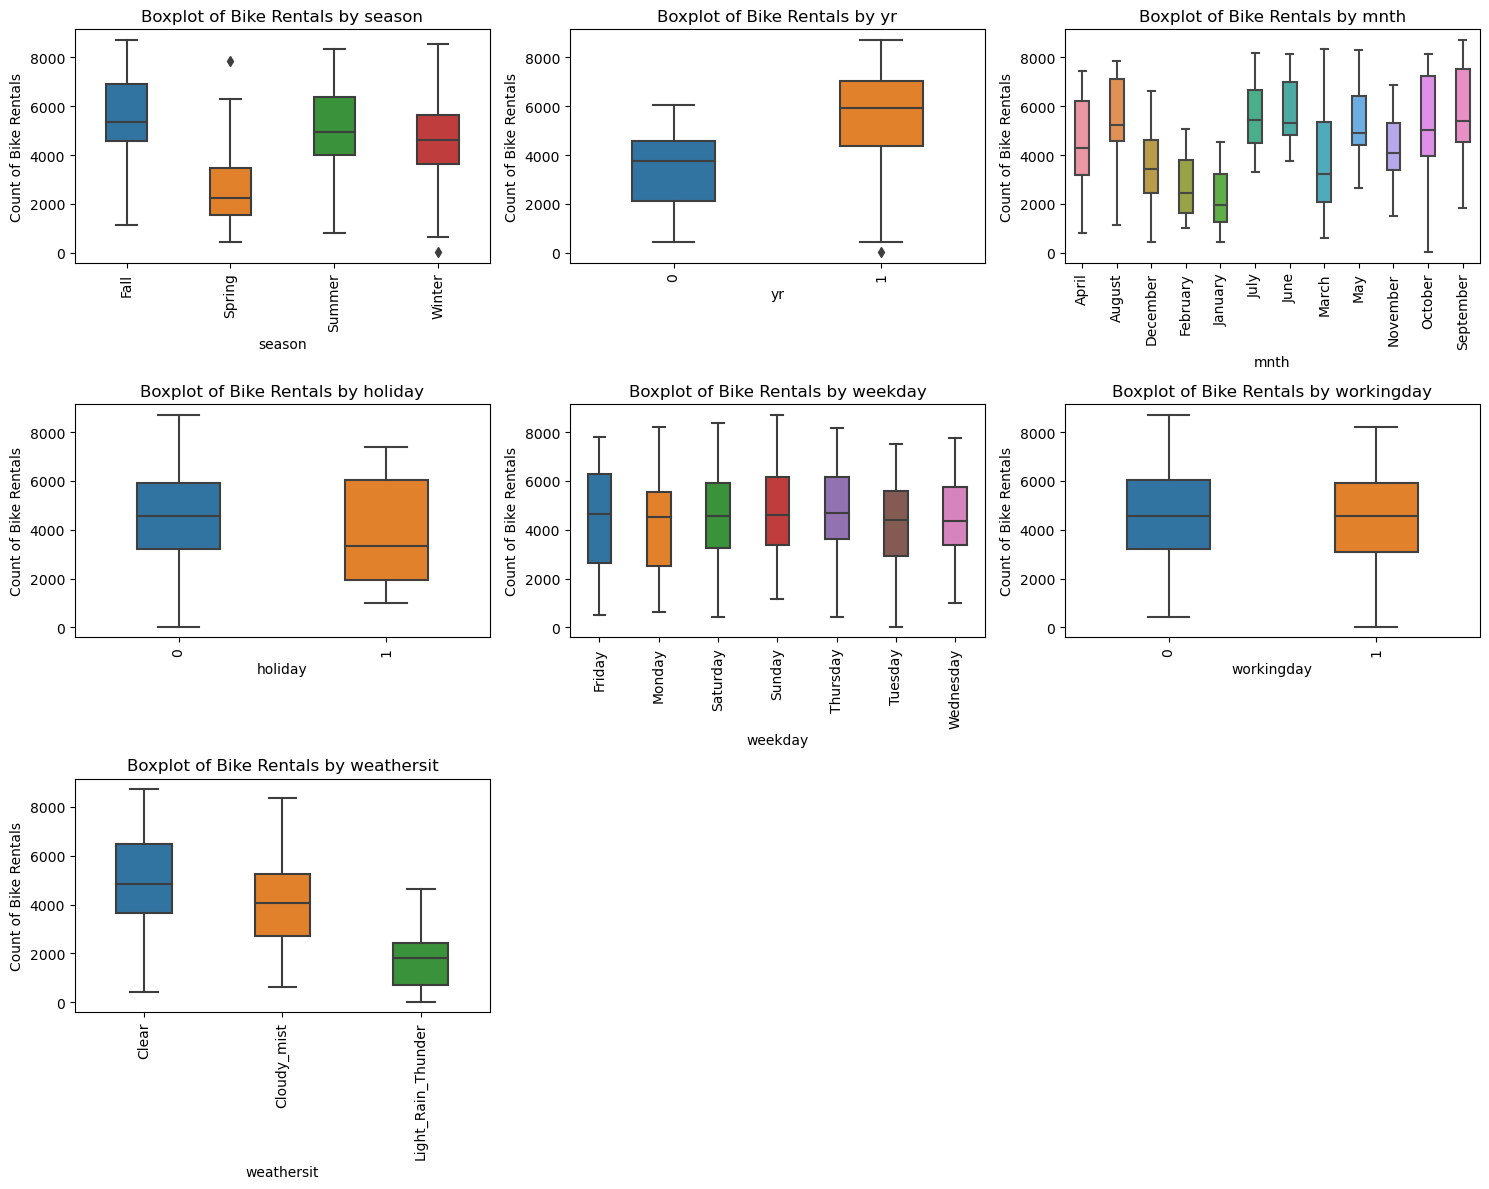

In [16]:
# visualizing variables
# visualizing variables
cat_vars = ['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit']

plt.figure(figsize=(15, 12))
for i, cat_var in enumerate(cat_vars, 1):
    plt.subplot(3, 3, i)
    day_dfboxplot = day_df[['cnt', cat_var]].copy()
    day_dfboxplot[cat_var] = day_df[cat_var].astype('category')
    
    sns.boxplot(x=cat_var, y='cnt', data=day_dfboxplot, width=0.4)
    plt.title(f'Boxplot of Bike Rentals by {cat_var}')
    plt.xlabel(cat_var)
    plt.ylabel('Count of Bike Rentals')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

1.Seasonal Analysis:
Fall has the highest average rentals, followed closely by summer.

2. Year-wise Rentals:
2019 sees a notable increase with a median rise of approximately 2000 rentals compared to 2018.

3. Monthly Trend:
September tops the monthly rental count, with surrounding months showing substantial demand.
The trend aligns with seasonal patterns, indicating a correlation between rentals and seasons.

4. Holiday vs. Working Days:
Holidays generally result in lower rental counts compared to working days.
Holidays exhibit greater variability in rental demand.

5. Weekday Analysis:
Overall, no significant difference in rentals across weekdays is observed.
Thursdays and Sundays stand out with higher variability in rental counts compared to other weekdays.

### Checking outlier In Spring as we saw in boxplot. Median is around 2000 and 7000> seems like an outlier so we can drop this one row.

In [17]:
# Select rows from DataFrame 'df' where the season is "Spring" and cnt is greater than 7000
day_df_filtered = day_df[(day_df['season'] == 'Spring') & (day_df['cnt'] > 7000)]

In [18]:
day_df.shape


(730, 12)

In [19]:
# Dropping cnt > 7000 for spring
day_df.drop(day_df[(day_df.season == "Spring") & (day_df.cnt > 7000)].index,inplace=True)

In [20]:
# Dropped one row where season was spring and cnt was greater > 7000
day_df.shape

(729, 12)

In [21]:
day_df.dtypes

season         object
yr              int64
mnth           object
holiday         int64
weekday        object
workingday      int64
weathersit     object
temp          float64
atemp         float64
hum           float64
windspeed     float64
cnt             int64
dtype: object

### UNDERSTANDING CORELATION AMONG CATEGORICAL AND NUMERICAL VARIABLES

In [22]:
#selecting only numeric values for corelation
numeric_columns = day_df.select_dtypes(include=[np.number])

<Axes: >

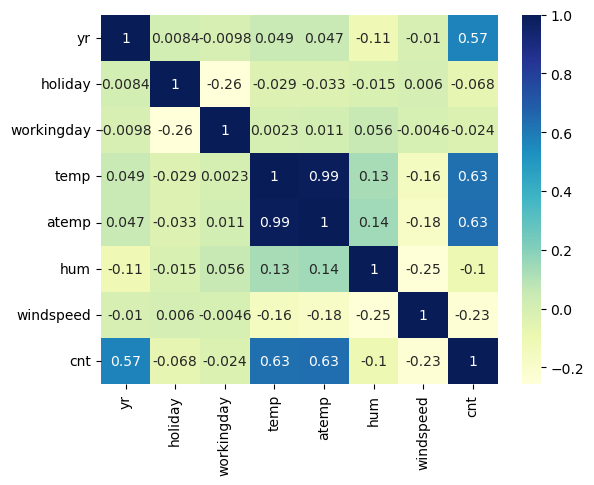

In [23]:
# Checking correlation
sns.heatmap(numeric_columns.corr(),cmap="YlGnBu",annot=True)

### FINDING
Highest correlation with cnt is seen in temp,atemp 

In [24]:
day_df.shape

(729, 12)

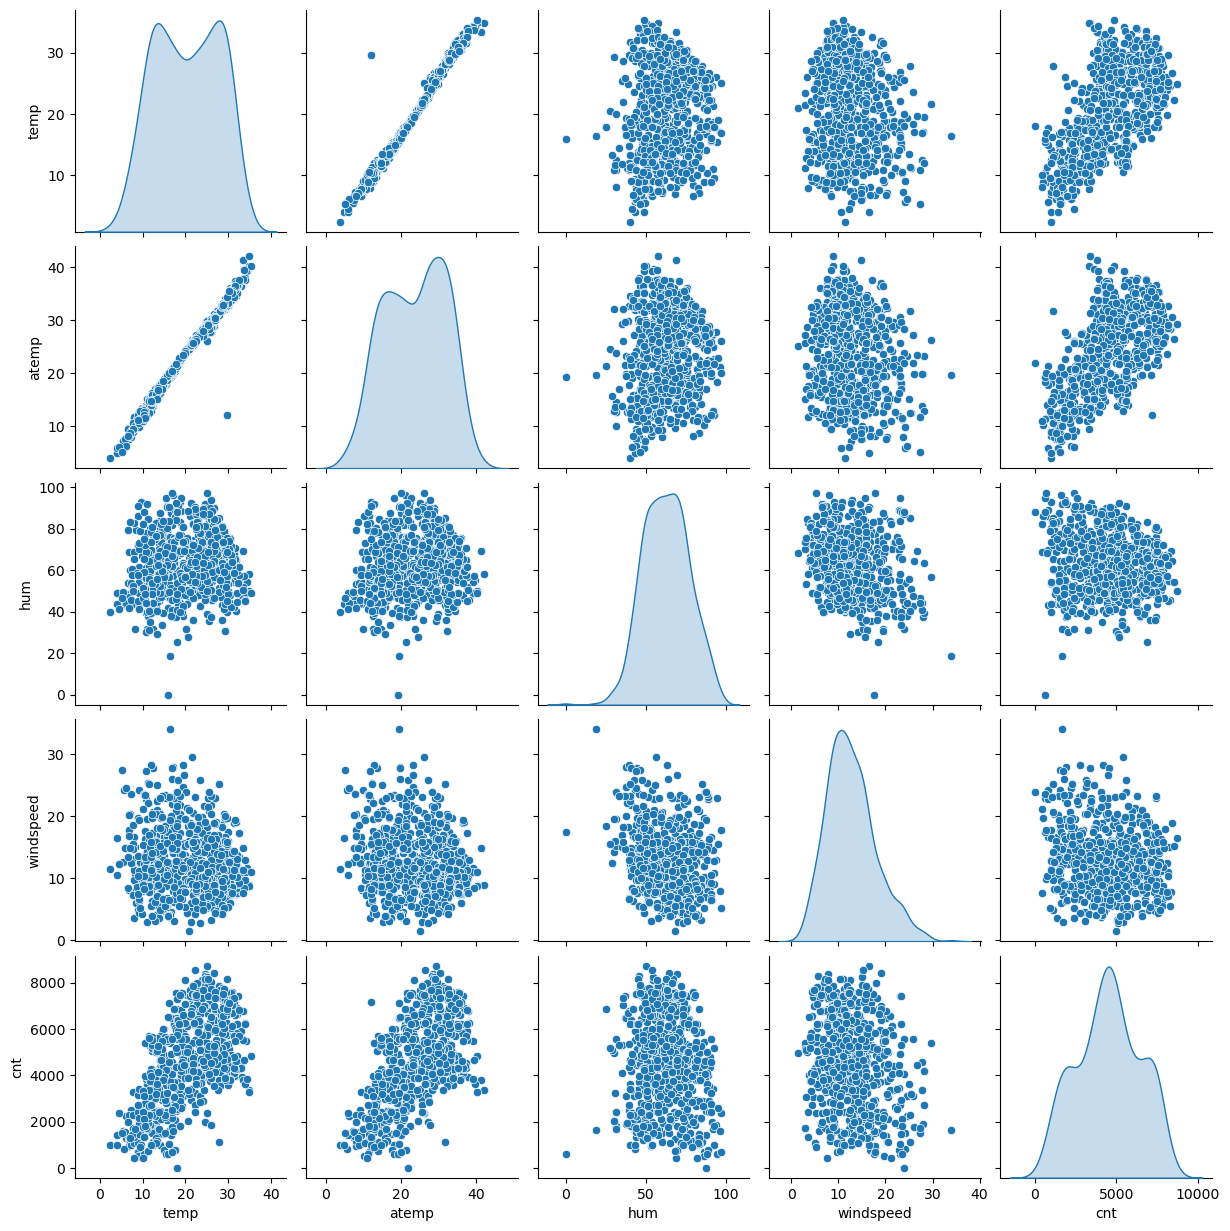

In [25]:
# Create a new dataframe of only numeric variables:

day_dfnew=day_df[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(day_dfnew, diag_kind='kde')
plt.show()

temp and atemp is showing strong corelation

## STEP 3:DATA PREPARATION

### LET'S PREPARE DATA USING pd.get_dummies

In [26]:
# creating idummy variables
season_dum = pd.get_dummies(day_df['season'],drop_first=True)
mnth_dum = pd.get_dummies(day_df['mnth'],drop_first=True)
weekday_dum = pd.get_dummies(day_df['weekday'],drop_first=True)
weathersit_dum = pd.get_dummies(day_df['weathersit'],drop_first=True)

In [27]:
day_df.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [28]:
# Adding indicator variable columns to the dataset . Dropping original columns
day_df = pd.concat([day_df,season_dum,mnth_dum,weekday_dum,weathersit_dum],axis=1)
day_df.drop(columns=['season','mnth','weekday','weathersit'],inplace=True)

In [29]:
day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,True,False,...,False,False,True,False,False,False,False,False,True,False
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,True,False,...,False,False,False,False,False,False,True,False,True,False
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,True,False,...,False,False,False,False,False,False,False,True,False,False
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,True,False,...,False,False,False,False,False,True,False,False,False,False
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,True,False,...,False,False,False,False,False,False,False,False,False,False


In [30]:
# Replace True/False with 1/0
day_df = day_df.replace({True: 1, False: 0})

In [31]:
day_df.shape

(729, 30)

In [32]:
day_df.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'cnt', 'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

## STEP 4:SPLITTING DATA INTO TRAIN TEST 
Splitting the data to Train and Test: - We will now split the data into TRAIN and TEST (70:30 ratio)

We will use train_test_split method from sklearn package for this

In [33]:
from sklearn.model_selection import train_test_split

# We should specify 'random_state' so that the train and test data set always have the same rows, respectively
np.random.seed(30)

day_df_train,day_df_test=train_test_split(day_df,train_size=0.70,test_size=0.30,random_state=100)

In [34]:
day_df_train.shape

(510, 30)

In [35]:
day_df_test.shape

(219, 30)

### RESCALING THE FEATURES

All the features should have comparable scale for our model evaluation so we need to rescale it here we can use min max method

In [36]:
#import minmaxscalar from scikit learn for feature scaling
from sklearn.preprocessing import MinMaxScaler
#create an instance for minmaxscaleer class
scalar=MinMaxScaler()

In [37]:
#APPLY SCALAR TO ALL THE COLUMNS EXCEPT COLUMNS HAVING 0 AND 1
vars=['temp','hum','windspeed','atemp']
day_df_train[vars]=scalar.fit_transform(day_df_train[vars])

In [38]:
day_df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
626,1,0,1,0.614763,0.605564,0.553027,0.371638,7591,0,0,...,0,1,0,0,0,1,0,0,0,0
363,0,0,0,0.314673,0.314694,0.656076,0.197852,2999,1,0,...,0,0,0,0,1,0,0,0,0,0
425,1,0,0,0.366591,0.368552,0.677114,0.220569,3194,1,0,...,0,0,0,1,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,1796,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,4220,0,1,...,0,0,0,0,1,0,0,0,1,0


In [39]:
#statistcally analysing
day_df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.509804,0.021569,0.709804,0.539048,0.514650,0.648381,0.315400,4517.092157,0.241176,0.245098,...,0.082353,0.086275,0.156863,0.135294,0.135294,0.141176,0.141176,0.133333,0.343137,0.027451
std,0.500395,0.145413,0.454298,0.227284,0.213494,0.145999,0.170073,1968.461206,0.428217,0.430568,...,0.275172,0.281045,0.364028,0.342373,0.342373,0.348545,0.348545,0.340268,0.475223,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,431.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.336738,0.332086,0.538643,0.195527,3132.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.545711,0.529718,0.649205,0.285417,4540.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.739627,0.692378,0.755904,0.406426,6111.750000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8714.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


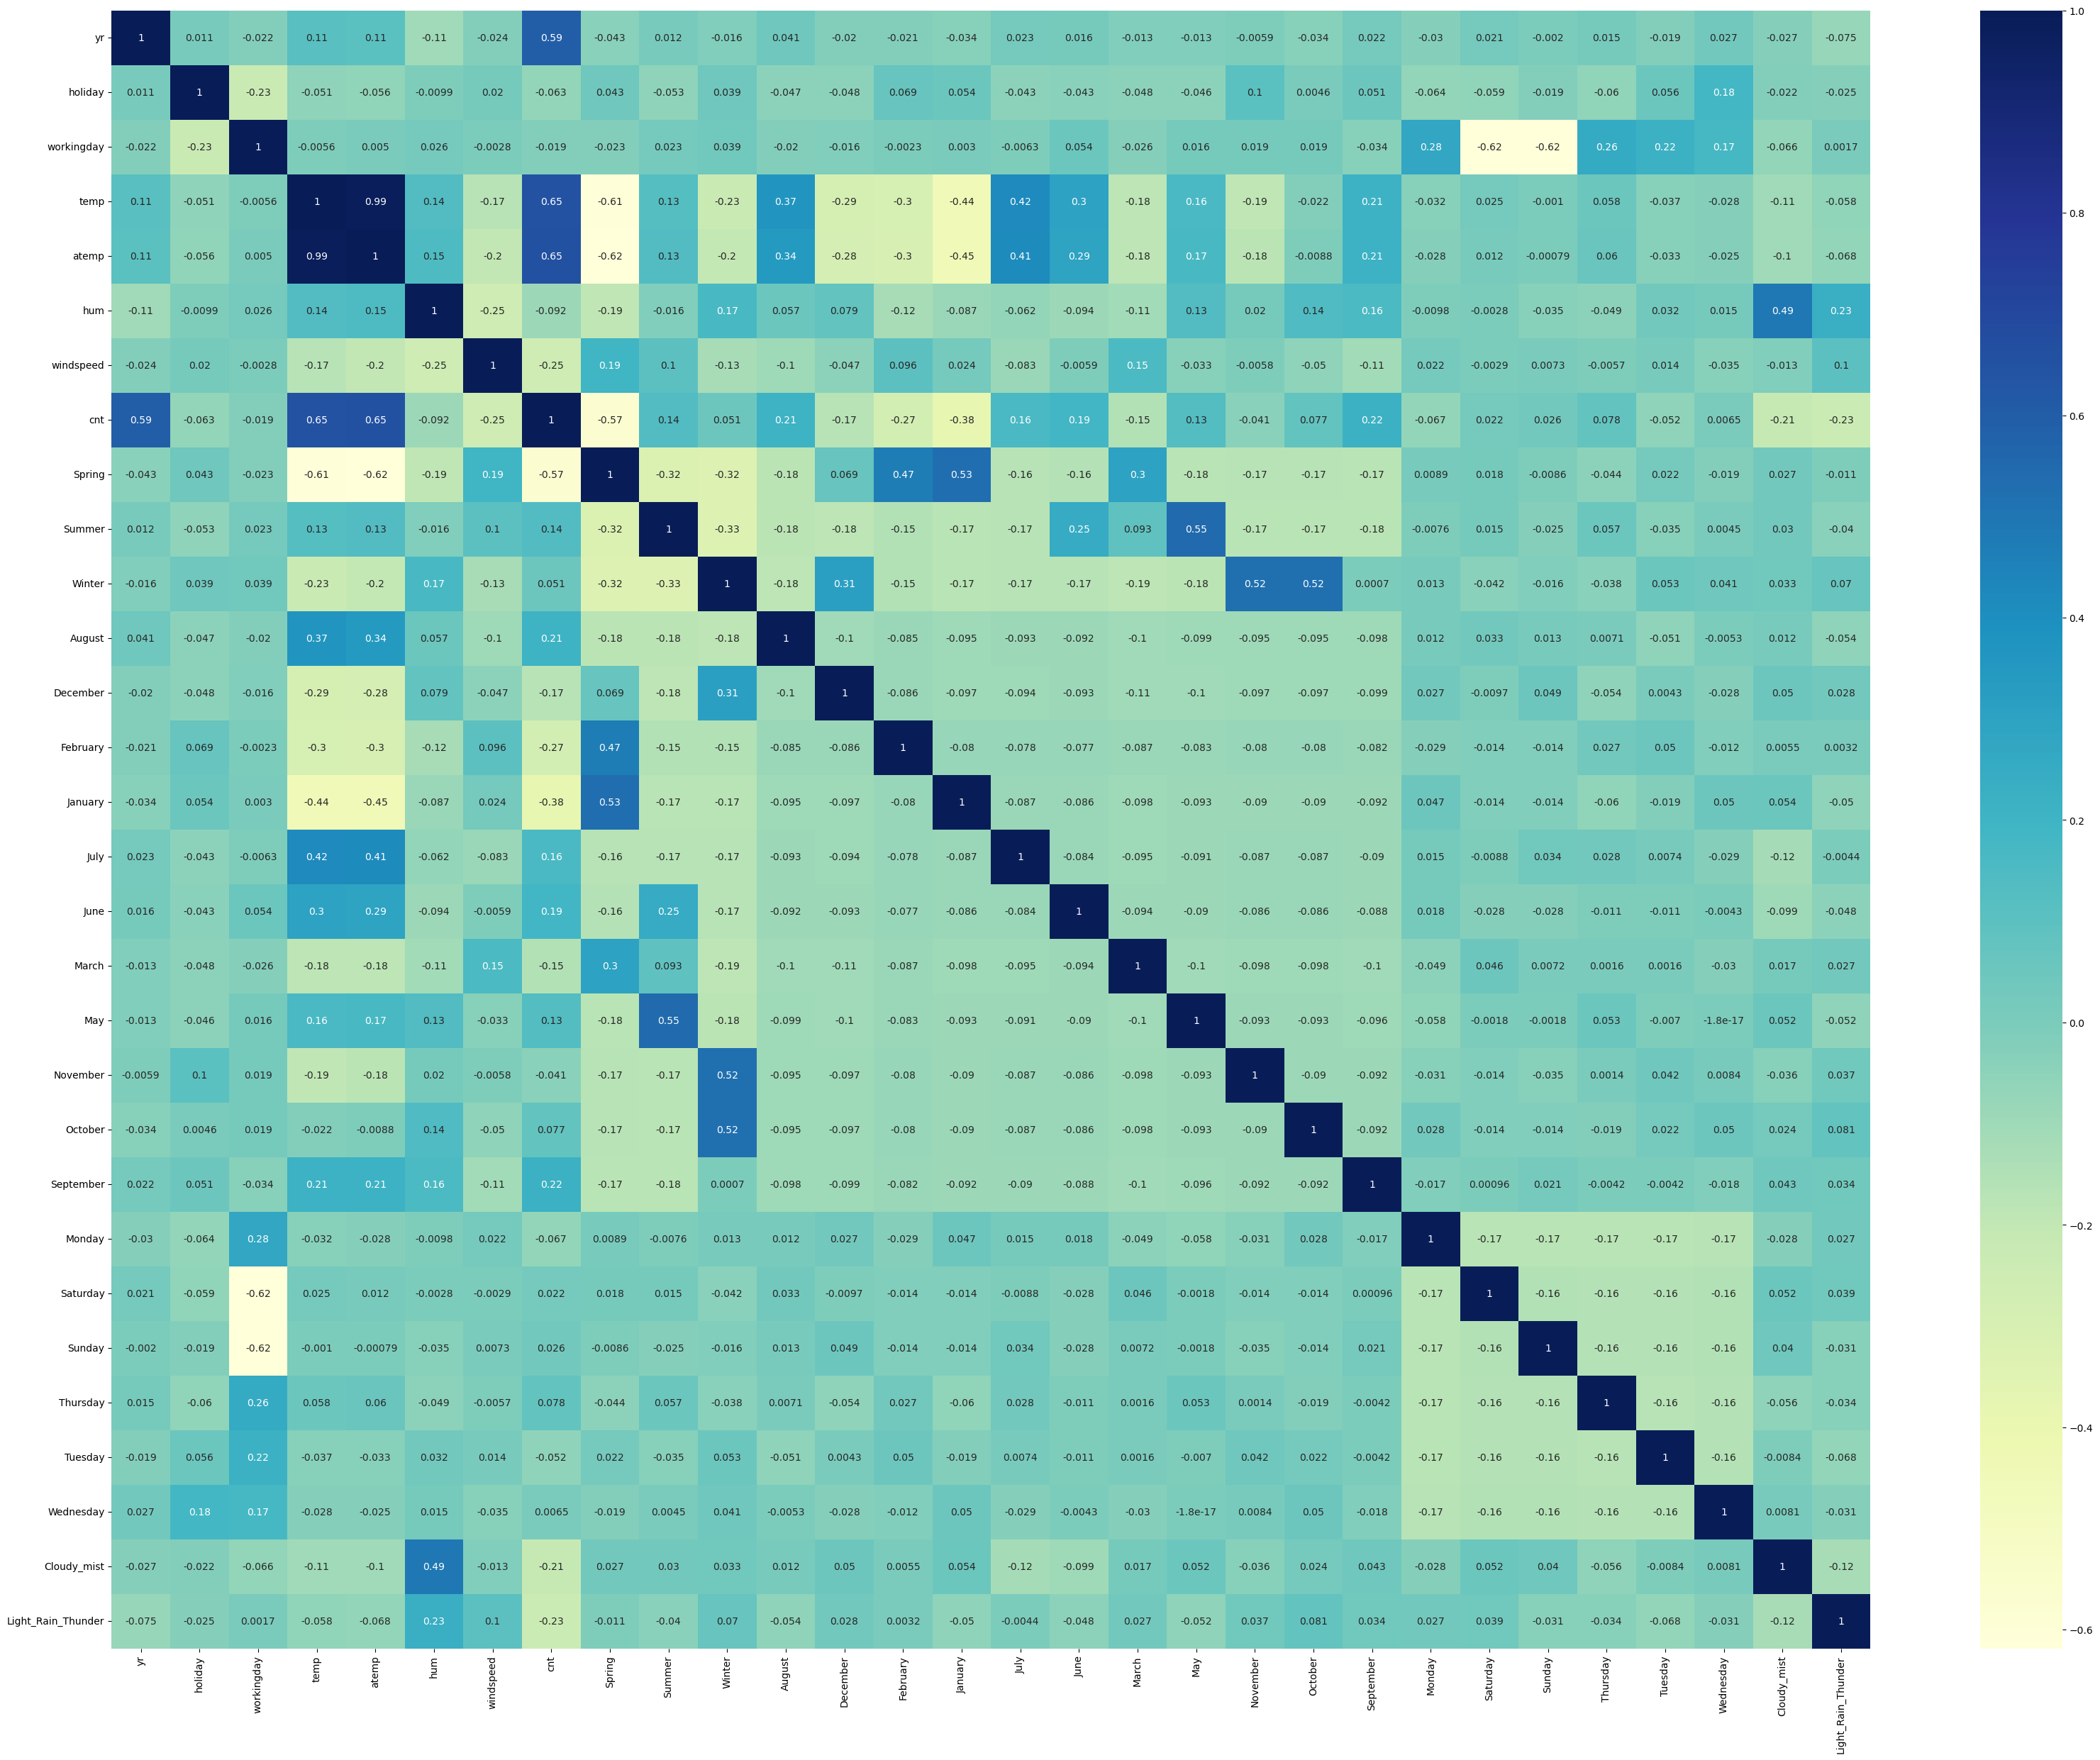

In [40]:
#let's see the corelation once more to see which values are highly corelated
plt.figure(figsize=(40,30))
sns.heatmap(day_df_train.corr(),annot=True,cmap='YlGnBu')
plt.show()

### DIVIDING X AND Y SETS TO MODEL BUILDING

In [41]:
y_train=day_df_train.pop('cnt')
x_train=day_df_train

## STEP 5: BUILDING A LINEAR MODEL

Fit a regression line through the training data using statsmodels. Remember that in statsmodels, you need to explicitly fit a constant using sm.add_constant(X) because if we don't perform this step, statsmodels fits a regression line passing through the origin, by default.

First we are creating a model with only feature temp because it is highly correlated to cnt

### MODEL 1:LINEAR REGRESSION

In [42]:
#import statsmodel
import statsmodels.api as sm
#add constant that contain only one feature that is 'tmp'
x_train_lm=sm.add_constant(x_train['temp'])
#fit ordinary least square(OLS) regression using stats model
lrmodel1=sm.OLS(y_train,x_train_lm).fit()


In [43]:
lrmodel1.params

const    1479.084302
temp     5635.880972
dtype: float64

In [44]:
lrmodel1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.423
Model:                            OLS   Adj. R-squared:                  0.422
Method:                 Least Squares   F-statistic:                     373.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):           9.67e-63
Time:                        13:42:52   Log-Likelihood:                -4451.1
No. Observations:                 510   AIC:                             8906.
Df Residuals:                     508   BIC:                             8915.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1479.0843    170.662      8.667      0.000    1143.795    1814.374
temp        5635.8810    291.770     19.316      0.000    5062.656    6209.106
==============================================================================
Omnibus:                       10.471   Durbin-Watson:                   2.045
Prob(Omnibus):                  0.005   Jarque-Bera (JB):                6.662
Skew:                           0.118   Prob(JB):                       0.0358
Kurtosis:                       2.492   Cond. No.                         5.74
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### ADDING ALL THE OTHER VALUES

R-squared is 0.423 we can do better than this there are a lot of feature variable adding all

In [45]:
x_train.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum', 'windspeed',
       'Spring', 'Summer', 'Winter', 'August', 'December', 'February',
       'January', 'July', 'June', 'March', 'May', 'November', 'October',
       'September', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday', 'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [46]:
x_train.dtypes

yr                      int64
holiday                 int64
workingday              int64
temp                  float64
atemp                 float64
hum                   float64
windspeed             float64
Spring                  int64
Summer                  int64
Winter                  int64
August                  int64
December                int64
February                int64
January                 int64
July                    int64
June                    int64
March                   int64
May                     int64
November                int64
October                 int64
September               int64
Monday                  int64
Saturday                int64
Sunday                  int64
Thursday                int64
Tuesday                 int64
Wednesday               int64
Cloudy_mist             int64
Light_Rain_Thunder      int64
dtype: object

### MODEL 2:MULTIPLE LINEAR REGRESSION

In [47]:
#adding constant to all feature
x_train_lm=sm.add_constant(x_train)
#fit ordinary least square(OLS) regression model using statsmodel
lrmodel2=sm.OLS(y_train,x_train_lm).fit()

In [48]:
lrmodel2.params

const                 2305.349636
yr                    1990.404116
holiday                 42.875000
workingday             689.400651
temp                  3455.306712
atemp                  414.357254
hum                  -1552.563734
windspeed            -1383.326137
Spring                -546.280421
Summer                 299.812635
Winter                 875.505185
August                 206.280465
December              -331.570756
February              -241.811581
January               -389.220788
July                  -320.082910
June                    92.699564
March                   74.830297
May                    325.996251
November              -364.704573
October                167.513137
September              781.589057
Monday                -197.813283
Saturday               726.737699
Sunday                 767.943035
Thursday                36.478444
Tuesday               -192.563301
Wednesday              -50.394352
Cloudy_mist           -535.559549
Light_Rain_Thu

In [49]:
lrmodel2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.860
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     101.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          8.01e-185
Time:                        13:42:52   Log-Likelihood:                -4089.6
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     480   BIC:                             8366.
Df Model:                          29                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2305.3496    904.705      2.548      0.011     527.678    4083.021
yr                  1990.4041     68.988     28.851      0.000    1854.848    2125.960
holiday               42.8750    776.699      0.055      0.956   -1483.276    1569.026
workingday           689.4007    814.999      0.846      0.398    -912.006    2290.807
temp                3455.3067   1218.492      2.836      0.005    1061.069    5849.545
atemp                414.3573   1184.674      0.350      0.727   -1913.430    2742.144
hum                -1552.5637    331.405     -4.685      0.000   -2203.747    -901.381
windspeed          -1383.3261    224.380     -6.165      0.000   -1824.215    -942.437
Spring              -546.2804    247.063     -2.211      0.027   -1031.738     -60.822
Summer               299.8126    218.621      1.371      0.171    -129.761     729.386
Winter               875.5052    223.997      3.909      0.000     435.369    1315.641
August               206.2805    289.207      0.713      0.476    -361.987     774.548
December            -331.5708    281.339     -1.179      0.239    -884.379     221.237
February            -241.8116    283.075     -0.854      0.393    -798.032     314.408
January             -389.2208    290.324     -1.341      0.181    -959.685     181.243
July                -320.0829    298.031     -1.074      0.283    -905.689     265.523
June                  92.6996    216.746      0.428      0.669    -333.189     518.588
March                 74.8303    211.642      0.354      0.724    -341.028     490.689
May                  325.9963    182.741      1.784      0.075     -33.076     685.068
November            -364.7046    306.036     -1.192      0.234    -966.041     236.632
October              167.5131    301.108      0.556      0.578    -424.139     759.165
September            781.5891    270.690      2.887      0.004     249.705    1313.473
Monday              -197.8133    121.503     -1.628      0.104    -436.557      40.930
Saturday             726.7377    823.214      0.883      0.378    -890.810    2344.286
Sunday               767.9430    813.190      0.944      0.345    -829.909    2365.795
Thursday              36.4784    124.614      0.293      0.770    -208.378     281.335
Tuesday             -192.5633    124.980     -1.541      0.124    -438.139      53.012
Wednesday            -50.3944    127.865     -0.394      0.694    -301.639     200.851
Cloudy_mist         -535.5595     90.431     -5.922      0.000    -713.249    -357.870
Light_Rain_Thunder -1941.0640    233.373     -8.317      0.000   -2399.622   -1482.506
==============================================================================
Omnibus:                       79.514   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (J

### VIF(Variance Inflation Factor)

We can see from the model strong multicolinearity so looking for vif.It is an extremely important parameter to test our linear model. The formula for calculating VIF is:
1/1-R(j)^2

In [50]:
#importing variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
#create dataframe that contains all the feature values and their vif
vif=pd.DataFrame()
vif['features']=x_train.columns
vif['VIF']=[variance_inflation_factor(x_train.values,i) for i in range (x_train.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif=vif.sort_values(by='VIF',ascending=False)
vif

,features,VIF
3,temp,449.56
4,atemp,386.94
2,workingday,73.67
5,hum,41.82
22,Saturday,14.26
23,Sunday,13.52
7,Spring,12.73
9,Winter,11.01
8,Summer,9.78
10,August,6.73


### Next step :
It can be seen some variables have very high VIF values and high p_value so its better to use RFE recursive feature elimination to decide the best variables



### USING RFE(RECURSIVE FEATURE ELIMINATION) TO DECIDE THE BEST VARIABLES


In [51]:
#importing RFE and linear regression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
#creating a linear regression model
lm=LinearRegression()
lm.fit(x_train,y_train)
#setting up rfe An RFE object (rfe) is created, specifying that it should use the previously trained Linear Regression model
#(lm) and select the top 20 features during the elimination process.
rfe=RFE(lm,n_features_to_select=15)
#running rfe
rfe=rfe.fit(x_train,y_train)

In [52]:
#creating a dataframe rfe
rfe_table=pd.DataFrame(list(zip(x_train.columns,rfe.support_,rfe.ranking_)),columns=(['feature','support','rank']))
rfe_table.sort_values(by='rank',ascending=True)

,feature,support,rank
0,yr,True,1
23,Sunday,True,1
22,Saturday,True,1
20,September,True,1
17,May,True,1
27,Cloudy_mist,True,1
9,Winter,True,1
14,July,True,1
28,Light_Rain_Thunder,True,1
6,windspeed,True,1


In [53]:
#selecting columns based on rfe
selected_features=x_train.columns[rfe.support_]
selected_features

Index(['yr', 'workingday', 'temp', 'atemp', 'hum', 'windspeed', 'Spring',
       'Winter', 'July', 'May', 'September', 'Saturday', 'Sunday',
       'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [54]:
#selecting selected feature for model creation
x_train_rfe=x_train[selected_features]

In [55]:
x_train_rfe.head()

,yr,workingday,temp,atemp,hum,windspeed,Spring,Winter,July,May,September,Saturday,Sunday,Cloudy_mist,Light_Rain_Thunder
626,1,1,0.614763,0.605564,0.553027,0.371638,0,0,0,0,1,0,0,0,0
363,0,0,0.314673,0.314694,0.656076,0.197852,1,0,0,0,0,0,1,0,0
425,1,0,0.366591,0.368552,0.677114,0.220569,1,0,0,0,0,1,0,1,0
728,1,1,0.245101,0.200348,0.498067,0.663106,1,0,0,0,0,0,0,0,0
482,1,0,0.395666,0.391735,0.504508,0.188475,0,0,0,0,0,0,1,1,0


### MODEL 3:USING RFE

ADDING SELECTED VARIABLES TO THE MODEL

In [56]:
# Add a constant column to the DataFrame 'x_train_rfe' using statsmodels
x_train_lm=sm.add_constant(x_train_rfe)
# Fit Ordinary Least Squares (OLS) regression model using statsmodels
lrmodel3=sm.OLS(y_train,x_train_lm).fit()
# Print the summary of the regression model
print(lrmodel3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     190.1
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          4.83e-194
Time:                        13:42:52   Log-Likelihood:                -4103.7
No. Observations:                 510   AIC:                             8239.
Df Residuals:                     494   BIC:                             8307.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2241.1542    362

#### CHECKING VIF

In [57]:
#create dataframe that contains all the name of feature variables and their feature value
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
2,temp,362.86
3,atemp,361.16
4,hum,30.80
1,workingday,20.08
5,windspeed,4.70
11,Saturday,4.59
12,Sunday,4.49
6,Spring,3.05
7,Winter,2.41
13,Cloudy_mist,2.34


### Model 4:

Removing the variable atemp based on its Very High 'VIF' value temp has high vif but it is temp and is important further analysis and atemp also gives temperature details so it is better to drop them

In [58]:
#DROP THE COLUMN ATEMP FROM THE DATAFRAME X_TRAIN_RFE
x_train_rfe.drop(['atemp'],inplace=True,axis=1)

In [59]:
#add constant using stasts model
x_train_lm=sm.add_constant(x_train_rfe)
#fit ordinary least squaare model(OLS) using linear regression using stats model
lrmodel4=sm.OLS(y_train,x_train_lm).fit()
#print the summary of regression model
lrmodel4.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.848
Method:                 Least Squares   F-statistic:                     203.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          4.18e-195
Time:                        13:42:53   Log-Likelihood:                -4104.0
No. Observations:                 510   AIC:                             8238.
Df Residuals:                     495   BIC:                             8301.
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2249.7989    362.338      6.209      0.000    1537.889    2961.709
yr                  1986.1303     69.305     28.658      0.000    1849.963    2122.298
workingday           719.8254    247.531      2.908      0.004     233.485    1206.166
temp                4223.1962    261.021     16.180      0.000    3710.351    4736.042
hum                -1669.9483    325.970     -5.123      0.000   -2310.404   -1029.493
windspeed          -1326.5400    216.550     -6.126      0.000   -1752.010    -901.070
Spring              -897.7637    130.689     -6.869      0.000   -1154.537    -640.990
Winter               570.9653    108.533      5.261      0.000     357.724     784.207
July                -652.8079    147.619     -4.422      0.000    -942.845    -362.771
May                  399.8681    132.614      3.015      0.003     139.312     660.424
September            605.3509    130.426      4.641      0.000     349.094     861.608
Saturday             836.4944    261.616      3.197      0.001     322.480    1350.509
Sunday               871.5843    261.460      3.334      0.001     357.875    1385.293
Cloudy_mist         -506.2410     90.907     -5.569      0.000    -684.852    -327.630
Light_Rain_Thunder -1853.5383    232.491     -7.973      0.000   -2310.329   -1396.748
==============================================================================
Omnibus:                       65.973   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              129.970
Skew:                          -0.745   Prob(JB):                     5.99e-29
Kurtosis:                       4.974   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### CHECKING VIF

In [60]:
#creating dataframe that contains all features and vif
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)


,features,VIF
3,hum,30.73
1,workingday,19.92
2,temp,17.84
10,Saturday,4.58
4,windspeed,4.56
11,Sunday,4.47
5,Spring,3.05
6,Winter,2.38
12,Cloudy_mist,2.34
0,yr,2.08


### Model 5:

Removing hum  based on its high 'VIF' value .

In [61]:
x_train_rfe.drop(['hum'],inplace=True,axis=1)

In [62]:
#add constant using statsmodel
x_train_lm=sm.add_constant(x_train_rfe)
#fit OLS regressionmodel using statsmodel
lrmodel5=sm.OLS(y_train,x_train_lm).fit()
#looking the summary
lrmodel5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     207.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          9.64e-191
Time:                        13:42:53   Log-Likelihood:                -4117.2
No. Observations:                 510   AIC:                             8262.
Df Residuals:                     496   BIC:                             8322.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1332.9176    322.969      4.127      0.000     698.361    1967.474
yr                  2031.9830     70.451     28.842      0.000    1893.563    2170.403
workingday           757.4615    253.640      2.986      0.003     259.120    1255.803
temp                3906.4999    259.968     15.027      0.000    3395.725    4417.275
windspeed          -1020.9160    213.402     -4.784      0.000   -1440.199    -601.633
Spring              -957.3071    133.443     -7.174      0.000   -1219.490    -695.124
Winter               451.4145    108.658      4.154      0.000     237.928     664.901
July                -594.1936    150.874     -3.938      0.000    -890.625    -297.763
May                  293.1129    134.258      2.183      0.029      29.328     556.898
September            551.2993    133.266      4.137      0.000     289.464     813.135
Saturday             908.6073    267.803      3.393      0.001     382.440    1434.775
Sunday               941.6447    267.665      3.518      0.000     415.748    1467.541
Cloudy_mist         -780.8864     75.262    -10.376      0.000    -928.758    -633.015
Light_Rain_Thunder -2328.1684    218.593    -10.651      0.000   -2757.650   -1898.686
==============================================================================
Omnibus:                       64.682   Durbin-Watson:                   2.051
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.946
Skew:                          -0.757   Prob(JB):                     1.48e-26
Kurtosis:                       4.818   Cond. No.                         23.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### FINDING VIF

In [63]:
#Creatind a dataframe containing all features and vif
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe.values,i) for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
1,workingday,15.16
2,temp,13.45
3,windspeed,4.49
9,Saturday,3.81
10,Sunday,3.66
4,Spring,2.69
0,yr,2.07
5,Winter,1.99
11,Cloudy_mist,1.58
6,July,1.46


### Model 6:

Removing the variable workingday based on its high VIF.

In [64]:
x_train_rfe.drop(['workingday'],inplace=True,axis=1)

In [65]:
#add constant using statsmodel
x_train_lm=sm.add_constant(x_train_rfe)
#creating OLS regression model using stats model
lrmodel6=sm.OLS(y_train,x_train_lm).fit()
lrmodel6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     220.0
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          5.19e-190
Time:                        13:42:53   Log-Likelihood:                -4121.7
No. Observations:                 510   AIC:                             8269.
Df Residuals:                     497   BIC:                             8324.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2078.2791    206.602     10.059      0.000    1672.358    2484.200
yr                  2026.5009     70.986     28.548      0.000    1887.031    2165.971
temp                3904.8060    262.031     14.902      0.000    3389.982    4419.630
windspeed          -1019.1158    215.094     -4.738      0.000   -1441.722    -596.510
Spring              -974.7637    134.372     -7.254      0.000   -1238.772    -710.756
Winter               443.8132    109.490      4.053      0.000     228.693     658.934
July                -585.1309    152.040     -3.849      0.000    -883.852    -286.410
May                  301.5657    135.293      2.229      0.026      35.748     567.383
September            526.3281    134.059      3.926      0.000     262.937     789.720
Saturday             171.1751    104.467      1.639      0.102     -34.077     376.427
Sunday               204.4050    104.263      1.960      0.050      -0.446     409.256
Cloudy_mist         -777.2371     75.849    -10.247      0.000    -926.261    -628.213
Light_Rain_Thunder -2310.2931    220.245    -10.490      0.000   -2743.018   -1877.568
==============================================================================
Omnibus:                       74.424   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              150.555
Skew:                          -0.819   Prob(JB):                     2.03e-33
Kurtosis:                       5.098   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### CHECKING FOR VIF

In [66]:
#creating a dataframe containing all features and vif
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe,i)for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
1,temp,5.22
2,windspeed,3.99
0,yr,2.06
3,Spring,1.70
10,Cloudy_mist,1.54
5,July,1.45
4,Winter,1.43
6,May,1.28
7,September,1.26
8,Saturday,1.20


### Model 7:

Removing the variable saturday based on its VIF and p value.


In [67]:
x_train_rfe.drop(['Saturday'],inplace=True,axis=1)

In [68]:
#add constant using statsmodel
x_train_lm=sm.add_constant(x_train_rfe)
#creating OLS regression model using stats model
lrmodel7=sm.OLS(y_train,x_train_lm).fit()
lrmodel7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     238.9
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          1.24e-190
Time:                        13:42:53   Log-Likelihood:                -4123.1
No. Observations:                 510   AIC:                             8270.
Df Residuals:                     498   BIC:                             8321.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2093.6657    206.737     10.127      0.000    1687.481    2499.850
yr                  2028.9650     71.090     28.541      0.000    1889.291    2168.639
temp                3920.6993    262.294     14.948      0.000    3405.361    4436.038
windspeed          -1022.5491    215.448     -4.746      0.000   -1445.847    -599.251
Spring              -969.7557    134.565     -7.207      0.000   -1234.140    -705.371
Winter               439.4315    109.643      4.008      0.000     224.013     654.850
July                -590.3650    152.264     -3.877      0.000    -889.524    -291.206
May                  298.2720    135.507      2.201      0.028      32.036     564.508
September            523.7206    134.276      3.900      0.000     259.904     787.537
Sunday               177.5904    103.145      1.722      0.086     -25.062     380.243
Cloudy_mist         -768.5812     75.793    -10.141      0.000    -917.494    -619.668
Light_Rain_Thunder -2292.1222    220.337    -10.403      0.000   -2725.027   -1859.217
==============================================================================
Omnibus:                       73.843   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              152.659
Skew:                          -0.805   Prob(JB):                     7.09e-34
Kurtosis:                       5.143   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
#creating a dataframe containing all features and vif
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe,i)for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
1,temp,5.11
2,windspeed,3.99
0,yr,2.06
3,Spring,1.69
9,Cloudy_mist,1.53
5,July,1.45
4,Winter,1.43
6,May,1.28
7,September,1.26
8,Sunday,1.15


### Model 8:

Removing the variable May based on its VIF and p value.


In [70]:
x_train_rfe.drop(['May'],inplace=True,axis=1)

In [71]:
#add constant using statsmodel
x_train_lm=sm.add_constant(x_train_rfe)
#creating OLS regression model using stats model
lrmodel8=sm.OLS(y_train,x_train_lm).fit()
lrmodel8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     260.3
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          8.30e-191
Time:                        13:42:56   Log-Likelihood:                -4125.5
No. Observations:                 510   AIC:                             8273.
Df Residuals:                     499   BIC:                             8320.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2164.7244    204.986     10.560      0.000    1761.982    2567.467
yr                  2024.5171     71.335     28.380      0.000    1884.363    2164.671
temp                3927.1157    263.286     14.916      0.000    3409.830    4444.401
windspeed          -1044.1069    216.053     -4.833      0.000   -1468.592    -619.622
Spring             -1035.6489    131.697     -7.864      0.000   -1294.398    -776.900
Winter               375.5324    106.136      3.538      0.000     167.004     584.061
July                -659.8771    149.526     -4.413      0.000    -953.655    -366.100
September            468.8004    132.445      3.540      0.000     208.582     729.018
Sunday               177.4073    103.541      1.713      0.087     -26.023     380.838
Cloudy_mist         -759.4175     75.969     -9.996      0.000    -908.676    -610.158
Light_Rain_Thunder -2301.5155    221.143    -10.407      0.000   -2736.001   -1867.030
==============================================================================
Omnibus:                       71.454   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.782
Skew:                          -0.802   Prob(JB):                     4.43e-31
Kurtosis:                       5.001   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
#creating a dataframe containing all features and vif
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe,i)for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
1,temp,4.70
2,windspeed,3.99
0,yr,2.06
3,Spring,1.65
8,Cloudy_mist,1.52
5,July,1.37
4,Winter,1.36
6,September,1.21
7,Sunday,1.15
9,Light_Rain_Thunder,1.07


### Model 7:
Removing the variable sunday based on  p value.

In [73]:
x_train_rfe.drop(['Sunday'],inplace=True,axis=1)

In [74]:
#add constant using statsmodel
x_train_lm=sm.add_constant(x_train_rfe)
#creating OLS regression model using stats model
lrmodel8=sm.OLS(y_train,x_train_lm).fit()
lrmodel8.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.835
Method:                 Least Squares   F-statistic:                     287.8
Date:                Sun, 17 Mar 2024   Prob (F-statistic):          2.05e-191
Time:                        13:42:57   Log-Likelihood:                -4127.0
No. Observations:                 510   AIC:                             8274.
Df Residuals:                     500   BIC:                             8316.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               2196.2887    204.552     10.737      0.000    1794.402    2598.175
yr                  2024.4256     71.473     28.324      0.000    1884.002    2164.850
temp                3910.1971    263.610     14.833      0.000    3392.278    4428.116
windspeed          -1039.3838    216.453     -4.802      0.000   -1464.653    -614.115
Spring             -1042.3694    131.893     -7.903      0.000   -1301.503    -783.236
Winter               370.8142    106.306      3.488      0.001     161.953     579.675
July                -647.4028    149.637     -4.326      0.000    -941.398    -353.408
September            475.8571    132.637      3.588      0.000     215.263     736.451
Cloudy_mist         -754.6420     76.065     -9.921      0.000    -904.088    -605.196
Light_Rain_Thunder -2313.0008    221.469    -10.444      0.000   -2748.125   -1877.877
==============================================================================
Omnibus:                       66.141   Durbin-Watson:                   2.021
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              128.848
Skew:                          -0.750   Prob(JB):                     1.05e-28
Kurtosis:                       4.952   Cond. No.                         13.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
#creating a dataframe containing all features and vif
vif=pd.DataFrame()
vif['features']=x_train_rfe.columns
vif['VIF']=[variance_inflation_factor(x_train_rfe,i)for i in range(x_train_rfe.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif.sort_values(by='VIF',ascending=False)

,features,VIF
1,temp,4.67
2,windspeed,3.97
0,yr,2.06
3,Spring,1.64
7,Cloudy_mist,1.51
5,July,1.37
4,Winter,1.36
6,September,1.21
8,Light_Rain_Thunder,1.07


This is a good model with R2 83 and adjusted R2 83

The VIF of all features are less than 5 and p value are less than 0.05 which are the standards.

After all the model building we have 9 feature variable

## STEP 6:RESIDUAL ANLYSIS OF TRAIN DATA

to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [76]:
#Add a constant column to dataframe x_train_rfe using statsmodel
x_train_sm=sm.add_constant(x_train_rfe)

In [77]:
#predict the target variable 'y_train_pred' using the trained regression model lr8 and the dataframe x_train_sm
y_train_pred=lrmodel8.predict(x_train_sm)

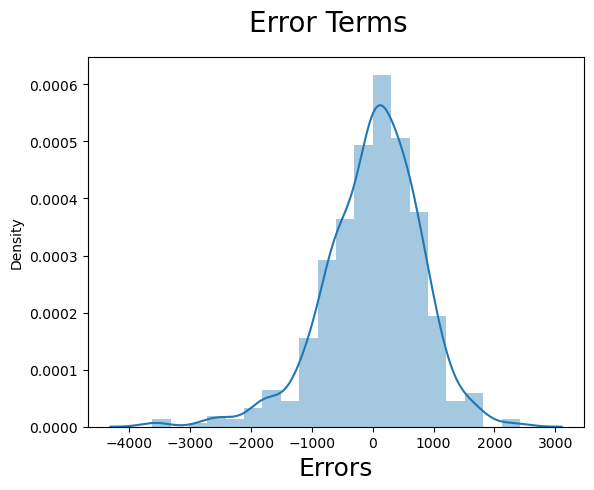

In [78]:
#plot the histogram for error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
 # Plot heading 
fig.suptitle('Error Terms', fontsize = 20)                 
plt.xlabel('Errors', fontsize = 18)
plt.show()

It is clear from the graph that errors are normally distributed we are seeing good bell curve

### Linearity Check

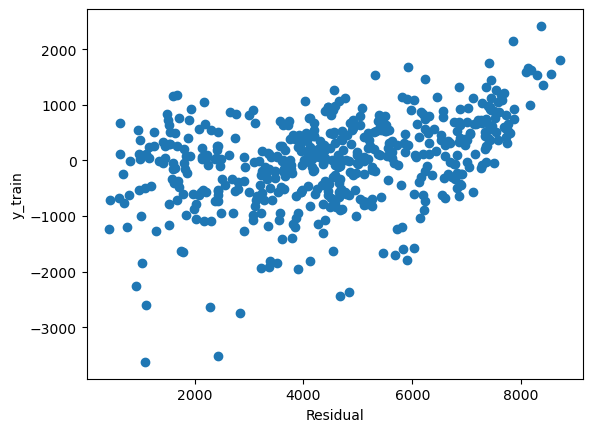

In [79]:
#scatter plot for the check
residual = (y_train - y_train_pred)
plt.scatter(y_train,residual)
plt.ylabel("y_train")
plt.xlabel("Residual")
plt.show()

It is clear thar error do not follow any pattern

## Step 7: Making Predictions Using the Final Model

In [80]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp','hum','windspeed','atemp']

day_df_test[num_vars] = scalar.transform(day_df_test[num_vars])

In [81]:
day_df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,Spring,Summer,...,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday,Cloudy_mist,Light_Rain_Thunder
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,...,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.474886,0.045662,0.648402,0.554935,0.529249,0.642466,0.326821,4471.652968,0.255708,0.269406,...,0.091324,0.073059,0.114155,0.159817,0.155251,0.146119,0.150685,0.164384,0.319635,0.031963
std,0.500513,0.209229,0.478563,0.230772,0.215679,0.148689,0.158694,1853.207583,0.437258,0.444668,...,0.288730,0.260830,0.318728,0.367276,0.362974,0.354034,0.358561,0.371472,0.467403,0.176306
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.298841,-0.042808,22.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.353611,0.344751,0.531773,0.212553,3235.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.547268,0.538428,0.636324,0.311480,4586.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.750790,0.709166,0.741240,0.415786,5635.500000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.815502,8227.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [82]:
#taking x_test and ytest
y_test=day_df_test.pop('cnt')
x_test=day_df_test

In [83]:
#adding constant variable to test dataframe
x_test_lm=sm.add_constant(x_test)
x_train_rfe.columns

Index(['yr', 'temp', 'windspeed', 'Spring', 'Winter', 'July', 'September',
       'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [84]:
x_test_lm.columns

Index(['const', 'yr', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'Spring', 'Summer', 'Winter', 'August', 'December',
       'February', 'January', 'July', 'June', 'March', 'May', 'November',
       'October', 'September', 'Monday', 'Saturday', 'Sunday', 'Thursday',
       'Tuesday', 'Wednesday', 'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [85]:
#making test as same as the feature variables we have in the model
x_test_lm = x_test_lm.drop(['const', 'atemp', 'workingday', 'hum', 'Summer', 'August', 'December', 'February', 'January',
                            'holiday', 'June', 'March', 'November', 'Monday', 'Thursday', 'Tuesday', 'Wednesday',
                            'May', 'Saturday', 'October','Sunday'], axis=1)

In [86]:
x_test_lm.columns

Index(['yr', 'temp', 'windspeed', 'Spring', 'Winter', 'July', 'September',
       'Cloudy_mist', 'Light_Rain_Thunder'],
      dtype='object')

In [87]:
# checking X_test_lm.head
x_test_lm.head()

,yr,temp,windspeed,Spring,Winter,July,September,Cloudy_mist,Light_Rain_Thunder
184,0,0.831783,0.084219,0,0,1,0,1,0
639,1,0.662528,0.133655,0,1,0,0,0,1
299,0,0.511964,0.334206,0,1,0,0,1,0
221,0,0.881625,0.339570,0,0,0,0,0,0
152,0,0.817246,0.537414,0,0,0,0,0,0


In [88]:
# Adding constant 
x_test_lm = sm.add_constant(x_test_lm)

In [89]:
x_test_lm.shape

(219, 10)

In [90]:
y_test

184    6043
639    4639
299    2659
221    4780
152    4968
       ... 
399    2832
417    4773
127    4333
395    4509
72     2046
Name: cnt, Length: 219, dtype: int64

In [91]:
# Making predictions using the model

y_test_pred = lrmodel8.predict(x_test_lm)

## Step 9: Model Evaluation

Let’s now plot the graph for actual versus predicted values.

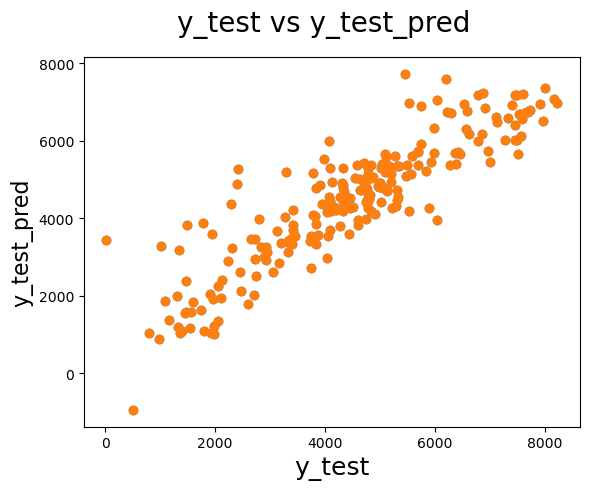

In [92]:
fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)             
plt.scatter(y_test, y_test_pred)
 # Plot heading 
fig.suptitle('y_test vs y_test_pred', fontsize = 20) 
# X-label
plt.xlabel('y_test', fontsize = 18)  
# y-label
plt.ylabel('y_test_pred', fontsize = 16)
plt.show()

from this we can see that our model is good

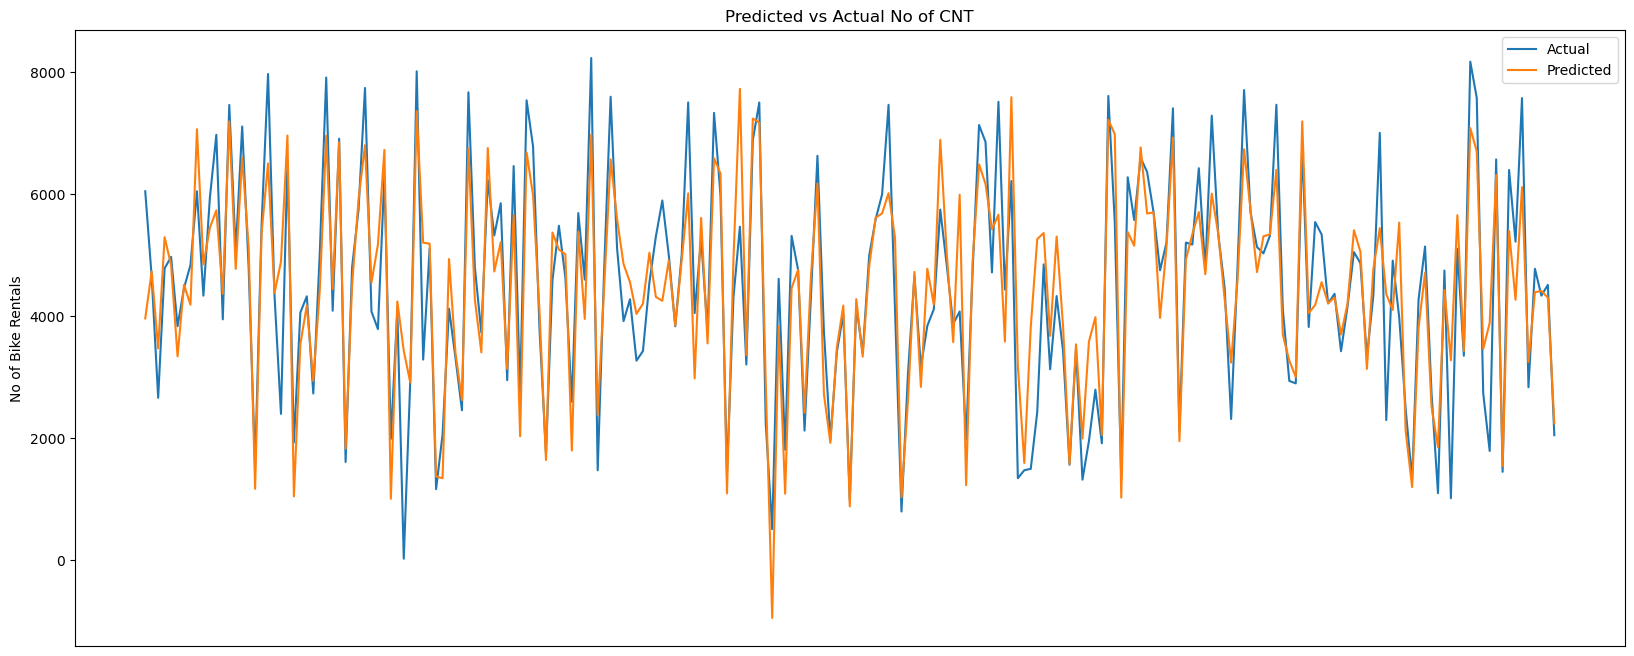

In [93]:
# Plotting Actual vs Predicted 
fig,ax = plt.subplots()
fig.set_figheight(8)
fig.set_figwidth(20)
l1,=ax.plot(range(len(y_test)),y_test)
l2, = ax.plot(range(len(y_test_pred)),y_test_pred)
plt.legend([l1,l2],['Actual','Predicted'])
plt.title('Predicted vs Actual No of CNT');
plt.ylabel('No of Bike Rentals')
plt.xticks([])
plt.show()

Actual and predicted is close so our model is good

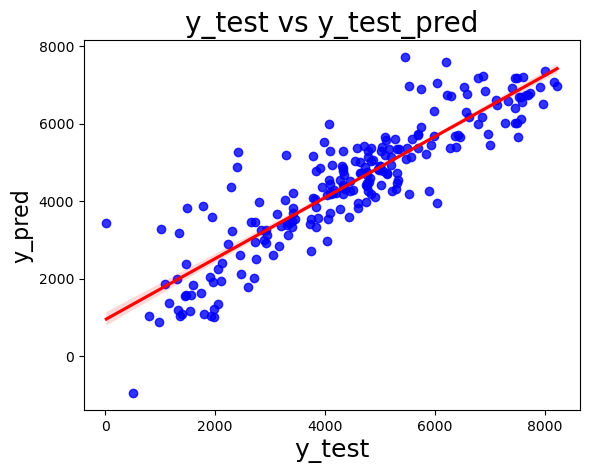

In [94]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_test_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

This is our best fit value almost all data points are explained by this

### CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA AND MEAN SQUARED ERROR

In [95]:
# CHECKING R SQUARED VALUE FOR TRAIN AND TEST DATA 
from sklearn.metrics import mean_squared_error,r2_score

mse = np.sqrt(mean_squared_error(y_test, y_test_pred))
rsquared_test = r2_score(y_test, y_test_pred)
rsquared_train = r2_score(y_train, y_train_pred)
print('R-squared for train data:',rsquared_train)
print('R-squared for test data:',rsquared_test)
print('Mean Squared Error',round(mse,3))

R-squared for train data: 0.8382111196717066
R-squared for test data: 0.7896250338555575
Mean Squared Error 848.061


In [96]:
lrmodel8.params.to_frame()

,0
const,2196.288689
yr,2024.425580
temp,3910.197067
windspeed,-1039.383789
Spring,-1042.369416
Winter,370.814159
July,-647.402789
September,475.857098
Cloudy_mist,-754.641963
Light_Rain_Thunder,-2313.000816


### Regression Equation: 

Regression Equation: CNT = 2196.2 +yr * 2024.42 + temp* 3910.19 -windspeed *1039.38 - Spring *1042.36+ Winter*370.81 -July*647.40+September *475.85 -Cloudy_mist *754.64- Light_Rain_Thunder*2313

### Final Report on Bike Booking Prediction
Overview
Our final multiple linear regression model aims to predict bike bookings based on a set of predictor variables. After thorough analysis, we have identified the impact of each variable on bike bookings.

## Top Predictor Variables:

Year (yr):

Coefficient: 2024.42

Interpretation: A unit increase in the year variable increases the bike hire numbers by 2024.42 units.

Temperature (temp):

Coefficient: 3910.19

Interpretation: A unit increase in the temperature variable increases the bike hire numbers by 3910.19 units.

Windspeed:

Coefficient: -1039.38

Interpretation: A unit increase in windspeed decreases the bike hire numbers by 1039.38 units

### Recommendations:

The top three predictor variables that significantly influence bike bookings are as follows:

Year (yr): Focus on understanding and leveraging the increasing trend over the years.

Temperature (temp): Consider the positive impact of temperature on bike bookings and plan activities accordingly.

Windspeed: Be mindful of the negative impact of windspeed on bike booking

### Next Steps:

For further analysis, it is recommended to explore the following variables:<br/>
Spring:-1042.36<br/>
Coefficient:<br/> 
Interpretation: The Spring season has a negative impact on bike bookings, decreasing them by 1042.36 units.<br/>
winter:<br/>
Coefficient:370.81<br/>
Interpretation: The winter season has a positive impact on bike bookings, increasing them by 370.81 units.<br/>
july:<br/>
Coefficient: -647.40<br/>
Interpretation: The month of july has a negative impact on bike bookings, decreasing them by 647.40 units.<br/>
september:<br/>
Coefficient: 475.85<br/>
Interpretation: The month of september has a positive impact on bike bookings, increasing them by 475.85 units.<br/>
Cloudy_mist:<br/>
Coefficient:-754.64<br/>
Interpretation: Cloudy and misty weather has a negative impact on bike bookings, decreasing them by 754.64 units.<br/>
Light_Rain_Thunder:<br/>
Coefficient: -2313<br/>
Interpretation: Light rain and thunderstorms have a significant negative impact on bike bookings, decreasing them by 2313 units.<br/>